## US CORRELATION CODE

In [2]:
import pandas as pd

#Read csv
df = pd.read_csv("US_data.csv")

df

,date,Active,Recovered,Death,Unemployment rate,Unemployment Insurance Initial Claims (in Thousands),Weekly % Change,Converted to Daily,Stock Prices
0,1/1/20,0,0,0,3.60,212.0,NaN,NaN,25705.63839
1,1/2/20,0,0,0,3.60,212.0,NaN,NaN,28868.80078
2,1/3/20,0,0,0,3.60,212.0,NaN,NaN,28634.88086
3,1/4/20,0,0,0,3.60,212.0,NaN,NaN,25705.63839
4,1/5/20,0,0,0,3.60,212.0,NaN,NaN,25705.63839
...,...,...,...,...,...,...,...,...,...
118,4/28/20,1012582,115936,58355,3.83,3839.0,-0.1357,-0.0206,24101.55078
119,4/29/20,1039909,120720,60967,3.83,3839.0,-0.1357,-0.0206,24633.85938
120,4/30/20,1069424,153947,62996,3.83,3839.0,-0.1357,-0.0206,24345.72070
121,5/1/20,1103461,164015,64943,NaN,NaN,NaN,NaN,23723.68945


In [17]:
#Check columns
df.columns

Index(['date', 'Active', 'Recovered ', 'Death', 'Unemployment rate',
       'Unemployment Insurance Initial Claims (in Thousands)',
       'Weekly % Change', 'Converted to Daily', 'Stock Prices'],
      dtype='object')

In [18]:
df.head


# Data Cleaning Process
print(df.isnull().sum())
df['Unemployment rate'] = df['Unemployment rate'].fillna(df['Unemployment rate'].mean())
df['Unemployment Insurance Initial Claims (in Thousands)'] = df['Unemployment Insurance Initial Claims (in Thousands)'].fillna(df['Unemployment Insurance Initial Claims (in Thousands)'].mean())

df['Weekly % Change'] = df['Weekly % Change'].fillna(df['Weekly % Change'].mean())
df['Converted to Daily'] = df['Converted to Daily'].fillna(df['Converted to Daily'].mean())


print(df.isnull().sum())

date                                                     0
Active                                                   0
Recovered                                                0
Death                                                    0
Unemployment rate                                        2
Unemployment Insurance Initial Claims (in Thousands)     2
Weekly % Change                                         12
Converted to Daily                                      12
Stock Prices                                             0
dtype: int64
date                                                    0
Active                                                  0
Recovered                                               0
Death                                                   0
Unemployment rate                                       0
Unemployment Insurance Initial Claims (in Thousands)    0
Weekly % Change                                         0
Converted to Daily                                

In [19]:
# Convert to Date datatype
import datetime as dt
df['date'] = pd.to_datetime(df['date'])
df['date']=df['date'].map(dt.datetime.toordinal)

df

,date,Active,Recovered,Death,Unemployment rate,Unemployment Insurance Initial Claims (in Thousands),Weekly % Change,Converted to Daily,Stock Prices
0,737425,0,0,0,3.600000,212.000000,0.733341,0.031162,25705.63839
1,737426,0,0,0,3.600000,212.000000,0.733341,0.031162,28868.80078
2,737427,0,0,0,3.600000,212.000000,0.733341,0.031162,28634.88086
3,737428,0,0,0,3.600000,212.000000,0.733341,0.031162,25705.63839
4,737429,0,0,0,3.600000,212.000000,0.733341,0.031162,25705.63839
...,...,...,...,...,...,...,...,...,...
118,737543,1012582,115936,58355,3.830000,3839.000000,-0.135700,-0.020600,24101.55078
119,737544,1039909,120720,60967,3.830000,3839.000000,-0.135700,-0.020600,24633.85938
120,737545,1069424,153947,62996,3.830000,3839.000000,-0.135700,-0.020600,24345.72070
121,737546,1103461,164015,64943,3.838017,1865.809917,0.733341,0.031162,23723.68945


In [20]:
# Building Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

X = pd.DataFrame(df[['date','Active', 'Recovered ', 'Death', 'Unemployment Insurance Initial Claims (in Thousands)']])
y = pd.DataFrame(df['Unemployment rate'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

[0.5311076330645419, 0.590769062621527, 0.5231784485115343]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1adcde90>,
      dtype=object)

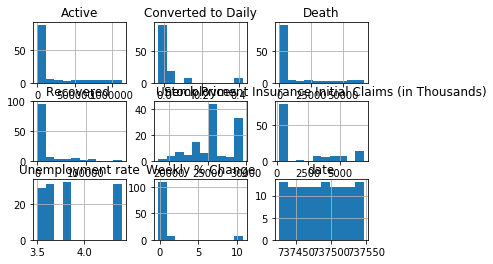

In [21]:
# Create Histograms
df.hist()

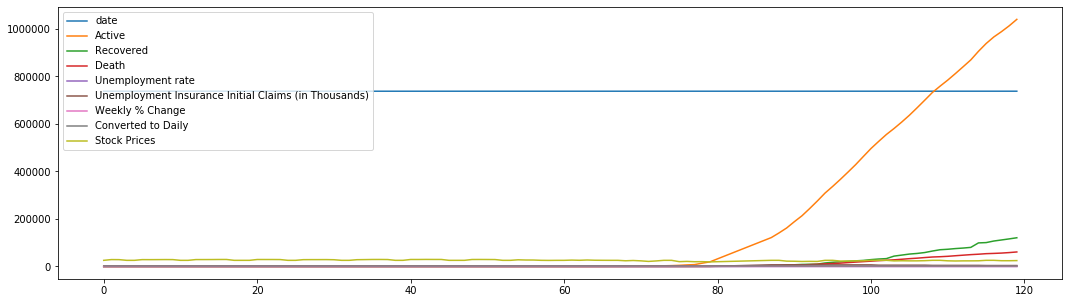

In [22]:
# Basic Viz plots
import numpy as np
from scipy import stats
std_dev = 3
df = df[(np.abs(stats.zscore(df)) < float(std_dev)).all(axis=1)]
df.plot(figsize=(18,5))

In [23]:
# Define Correlation Matrix
corrMatrix = df[['Active', 'Recovered ', 'Death', 'Unemployment rate','Stock Prices']].corr()
corrMatrix

,Active,Recovered,Death,Unemployment rate,Stock Prices
Active,1.000000,0.972207,0.992656,0.078791,-0.380992
Recovered,0.972207,1.000000,0.991127,0.047006,-0.308023
Death,0.992656,0.991127,1.000000,0.057063,-0.339881
Unemployment rate,0.078791,0.047006,0.057063,1.000000,-0.589507
Stock Prices,-0.380992,-0.308023,-0.339881,-0.589507,1.000000


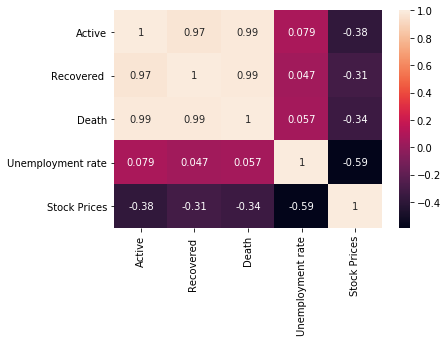

In [24]:
# Display Matrix
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrMatrix, annot=True)
plt.show()

## INDIA CORRELATION CODE

In [27]:
# Read csv
df = pd.read_csv("NewIndia.csv")

df

,Date,Confirmed,Recovered,Deaths,BSE Index
0,5/4/20,46437,12847,1566,31715.35000
1,5/3/20,42505,11775,1391,35483.84567
2,5/2/20,39699,10819,1323,35483.84567
3,5/1/20,37257,10007,1223,35483.84567
4,4/30/20,34863,9068,1154,33717.62000
...,...,...,...,...,...
99,1/26/20,0,0,0,35483.84567
100,1/25/20,0,0,0,35483.84567
101,1/24/20,0,0,0,41613.19000
102,1/23/20,0,0,0,41386.40000


In [28]:
df.columns

Index(['Date', 'Confirmed', 'Recovered', 'Deaths', 'BSE Index'], dtype='object')

In [29]:
# Convert to Date datatype
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

df

df.to_csv("NewIndia",index=False)

In [32]:
# Define Correlation Matrix
corrMatrix = df[['Confirmed', 'Recovered', 'Deaths', 'BSE Index']].corr()
corrMatrix

,Confirmed,Recovered,Deaths,BSE Index
Confirmed,1.000000,0.981699,0.999535,-0.277939
Recovered,0.981699,1.000000,0.982474,-0.219074
Deaths,0.999535,0.982474,1.000000,-0.271159
BSE Index,-0.277939,-0.219074,-0.271159,1.000000


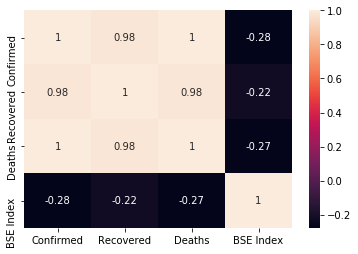

In [33]:
# Correlation Viz
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrMatrix, annot=True)
plt.show()